# Post-workshop exercise
We hope that after completing this exercise you have an idea of what it takes to analyse and visualize real-world data in python and that you can apply the learned skills to your own projects. 
For this exercise we use the 'health, lifestyle, health care use and supply, causes of death; from 1900' dataset from CBS opendata. 
This is quite a challenging dataset to work with. 
That is on purpose, we want this exercise to resemble your daily work as much as possible.

You can get a visual overview of the data [here]( https://opendata.cbs.nl/statline/#/CBS/en/dataset/37852eng/table?ts=1671446345991). 
For this exercise please use [this csv file](https://raw.githubusercontent.com/esciencecenter-digital-skills/2023-01-25-ds-python-rivm/data/Health__lifestyle__health_care_use_and_supply__causes_of_death__from_1900_21122022_143458.csv)
, right-click and click 'save as' to download it to your computer. 
We slightly adapted the format of the data so that it is easier to read into pandas. 

We want you to learn as much as possible from this exercise. 
If you are stuck for longer than 10 minutes, just have a look at [the solution notebook](https://github.com/esciencecenter-digital-skills/2023-01-25-ds-python-rivm/blob/main/files/solutions-post-workshop-exercise.ipynb). 
But do not keep the solutions next to you when going through the exercise. 
You can also ask Jurriaan (jurriaan.biesheuvel@rivm.nl), Xiaoheng (xiaoheng.huang@rivm.nl), or Markus (markus.viljanen@rivm.nl) for help. 

We expect you to take about 1 day to finish the exercise. See how far you get.

Imagine you have the task to explore the dataset and present your findings to your colleagues in a jupyter notebook. 
So make the graphs as readable as possible, 
and put some clarifying documentation in markdown cells around your code, it is good to practice this.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine as p9

## 1. Loading the data
1. Load the data in pandas. (Hint: check the separator that is used in the file, you can pass a different separator to `read_csv()` using the `sep` argument)
2. Take a look at the data. As you can see, the Topic is read as a column and not as index. You can fix this by passing `index_col='Topic'` to `read_csv()`.

In [2]:
filepath = '../data/Health__lifestyle__health_care_use_and_supply__causes_of_death__from_1900_21122022_143458.csv'
df = pd.read_csv(filepath, sep=';', index_col='Topic')
df.head()

,Unnamed: 1,1900,1940,1980,1990,2000,2010,2019,2020,2021,2022
Topic,,,,,,,,,,,
Demographic key figures|Population on January 1,x 1 000,5104,8834,14091,14893,15864,16575,17282,17408,17475,17591
Demographic key figures|Live born children,x 1 000,163,185,181,198,207,184,170,169,179,.
Demographic key figures|Deaths,x 1 000,92,88,114,129,141,136,152,169,171,.
Health status|Persons in (very) good health,%,.,.,.,81.7,80.4,80.3,78.7,81.5,80.5,.
Health status|Persons with complete dentures,%,.,.,.,23.7,15.7,.,.,.,.,.


## 2. Cleaning up the data
1. Take a look at the data. How are missing data represented?
2. Replace the value that is used for missing data with NaN. (hint: You can replace values using DataFrame.replace(). You can use numpy.nan to represent NaN values)
3. Rename the 'Unnamed: 1' column to 'unit'
4. What is the datatype of the numerical values?
5. Convert all data in the numerical columns (all columns excluding 'unit') to the 'float' datatype. Use a for-loop to loop over all the numerical columns. Change for a specific column inside the body of the for-loop.

In [3]:
# Missing data are represented as dots, to replace:
df = df.replace('.', np.nan)

In [4]:
df = df.rename(columns={'Unnamed: 1': 'unit'})

In [5]:
# Data types
df.dtypes

unit    object
1900    object
1940    object
1980    object
1990    object
2000    object
2010    object
2019    object
2020    object
2021    object
2022    object
dtype: object

In [6]:
# Convert data types for numerical columns to float
for column in ['1900', '1940', '1980', '1990', '2000', '2010', '2019', '2020', '2021', '2022']:
 df[column] = df[column].astype('float')

## 3. Getting an overview of the data
The dataset is quite large, or at least there are a lot of different topics in there. The topics are organized in a nested way, for example: 'Use of health care services|Contacts with health professionals|Dentist' consists of 3 levels: 'Use of health care services' (level 1) 'Contacts with health professionals' (level 2) 'Dentist' (level 3). We will write some functions to create a better overview of the dataset and get quicker access to the different topics of our interest.
1. First figure out how to get the level 1 topic from a full topic description. Create a new variable called topic: `topic = 'level 1| level 2 | level 3'`. Use the [`str.split`](https://www.w3schools.com/python/ref_string_split.asp) function and list indexing to get just the level 1 part of the string.
2. Create a function that returns a list with just the seven level 1 topics in the dataset. Hint 1: use your answer from the previous question. Hint 2: You can loop over the topics in the dataframe by doing `for topic in df.index:`.
3. Look at the code below. What does it do? Try it out! For example with `subset_data_starting_with(df, 'Use of health care services'`. Copy these functions to your notebook, it will be very handy for the next questions!

```python
def subset_data_starting_with(df, pattern):
    mask = df.index.str.startswith(pattern)
    subset = df.iloc[mask].copy()
    return subset

def rename_to_last_level(df):
    mapper = dict()
    for topic in df.index:
        mapper[topic] = topic.split('|')[-1]
    df = df.rename(index=mapper)
    return df
```

In [7]:
topic = 'level 1| level 2 | level 3'
topic.split('|')[0]

'level 1'

In [8]:
def get_level_1_topics(df):
    level_1_topics = list()
    for topic in df.index:
        level_1_topic = topic.split('|')[0]
        if level_1_topic not in level_1_topics:
            level_1_topics.append(level_1_topic)
    return level_1_topics
get_level_1_topics(df)

['Demographic key figures',
 'Health status',
 'Lifestyle',
 'Use of health care services',
 'Care supply',
 'Birth and life expectancy',
 'Causes of death']

In [9]:
def subset_data_starting_with(df, pattern):
    mask = df.index.str.startswith(pattern)
    subset = df.iloc[mask].copy()
    return subset

def rename_to_last_level(df):
    mapper = dict()
    for topic in df.index:
        mapper[topic] = topic.split('|')[-1]
    df = df.rename(index=mapper)
    return df

In [10]:
# Takes a subset of the data with topics starting with the pattern
subset = subset_data_starting_with(df, 'Use of health care services|Contacts with health professionals')
subset

,unit,1900,1940,1980,1990,2000,2010,2019,2020,2021,2022
Topic,,,,,,,,,,,
Use of health care services|Contacts with health professionals|General practitioner (GP),%,NaN,NaN,NaN,75.4,75.6,72.3,68.7,64.8,62.1,NaN
Use of health care services|Contacts with health professionals|Medical specialist,%,NaN,NaN,NaN,41.0,38.0,37.8,39.9,36.4,37.2,NaN
Use of health care services|Contacts with health professionals|Dentist,%,NaN,NaN,NaN,71.3,78.2,78.4,80.4,78.8,79.2,NaN
Use of health care services|Contacts with health professionals|Physiotherapist or exercise therapist,%,NaN,NaN,NaN,14.3,16.2,22.0,26.5,25.7,25.4,NaN
Use of health care services|Contacts with health professionals|Alternative healer,%,NaN,NaN,NaN,5.9,5.9,5.8,4.3,5.2,5.1,NaN


In [11]:
# Renames the topic to just the last level of the topic
subset = rename_to_last_level(subset)
subset

,unit,1900,1940,1980,1990,2000,2010,2019,2020,2021,2022
Topic,,,,,,,,,,,
General practitioner (GP),%,NaN,NaN,NaN,75.4,75.6,72.3,68.7,64.8,62.1,NaN
Medical specialist,%,NaN,NaN,NaN,41.0,38.0,37.8,39.9,36.4,37.2,NaN
Dentist,%,NaN,NaN,NaN,71.3,78.2,78.4,80.4,78.8,79.2,NaN
Physiotherapist or exercise therapist,%,NaN,NaN,NaN,14.3,16.2,22.0,26.5,25.7,25.4,NaN
Alternative healer,%,NaN,NaN,NaN,5.9,5.9,5.8,4.3,5.2,5.1,NaN


## 4. Plotting contacts with health professionals
We will look at the 'Use of health care services|Contacts with health professionals' data. We want to get a visual overview of how many people have contact with health professionals. But first, it's good to note that this is an aggregated dataset. Each value in the table actually comes from aggregating data of a lot of individuals. This is different from the dataset used in the course where every row corresponded with a single captured animal, and we had to aggregate it to plot. 

To help ourselves in plotting the data we will convert the data to the so-called 'long format' (you can read more about this [here](https://datacarpentry.org/python-socialsci/12-long-and-wide/index.html)). If you don't fully grasp it yet that's not a problem, just see it as a transformation of the data into a format that is handy for plotting. Here is the code for transforming our dataset to long format:

```python
def to_long_format(df):
    """
    Transforms the CBS health, lifestyle and causes of death dataset into 
    'long' format. In addition, drops the 'unit' column, and changes 'year'
    dtype to int.
    """
    df = df.drop(columns='unit')
    df['Topic'] = df.index # pd.melt cannot use the index so we have to create a column for it
    long_df = pd.melt(df, id_vars='Topic', var_name='year') 
    long_df['year'] = long_df['year'].astype(int)
    return long_df
```
1. Inspect the `to_long_format()` function. Compare the dataframes before and after passing it to the function. Can you make sense of what's happening and why?
2. Create a linegraph that shows the percentage of people having contact with a health professional for each category over time. The different categories (General practitioner (GP), Medical specialist, Dentist, Physiotherapist or exercise therapist, and Alternative healer) should show as different colored lines in the linegraph. Hint: Use the functions we defined previously to select the data, and transform it to long format. 
3. Create a bargraph that shows the percentage of people having contact with a health professional for each category (General practitioner (GP), Medical specialist, Dentist, Physiotherapist or exercise therapist, and Alternative healer) in **2021**. Hint: plotnine by default wants to plot the count of the values you pass it. Since our data is already aggregated we want to plot the actual values. You can do that by passing `stat='identity'` to the `geom_bar` function.


In [12]:
def to_long_format(df):
    """
    Transforms the CBS health, lifestyle and causes of death dataset into 
    'long' format. In addition, drops the 'unit' column, and changes 'year'
    dtype to int.
    """
    df = df.drop(columns='unit')
    df['Topic'] = df.index # pd.melt cannot use the index so we have to create a column for it
    long_df = pd.melt(df, id_vars='Topic', var_name='year') 
    long_df['year'] = long_df['year'].astype(int)
    return long_df

In [13]:
# Select the right subset of the data
health_contacts_df = subset_data_starting_with(df, 'Use of health care services|Contacts with health professionals')

# Rename to level 3 topics
health_contacts_df = rename_to_last_level(health_contacts_df)

# Transform to long format
health_contacts_df = to_long_format(health_contacts_df)

/Users/svenvanderburg/miniforge3/envs/teaching/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 4 rows containing missing values.


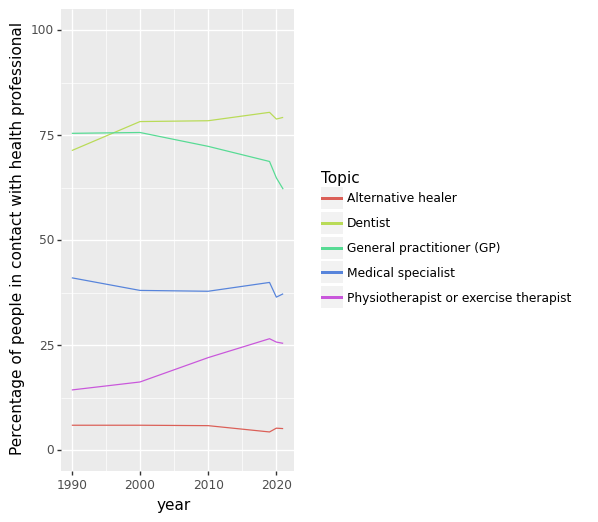

<ggplot: (697074204)>

In [14]:
(p9.ggplot(data=health_contacts_df,
           mapping=p9.aes(x='year', y='value', color='Topic'))
    + p9.geom_line()
    + p9.theme(figure_size=(3, 6))
    + p9.xlim([1990, 2021])
    + p9.ylim([0,100])
    + p9.ylab('Percentage of people in contact with health professional')
)

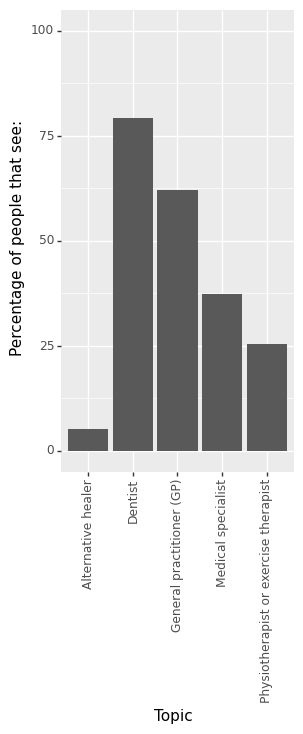

<ggplot: (697209326)>

In [15]:
(p9.ggplot(data=health_contacts_df[health_contacts_df['year'] == 2021],
           mapping=p9.aes(x='Topic', y='value'))
    + p9.geom_bar(stat='identity')
    + p9.theme(axis_text_x=p9.element_text(angle=90))
    + p9.ylab("Percentage of people that see:")
    + p9.ylim([0,100])
    + p9.theme(figure_size=(3, 6))
)

## 5. AIDS/HIV
We will now look at how the number of people infected with HIV and the number of people that developed AIDS developed over the years.
1. Make a lineplot with the years on the x-axis and the number of notifications on the y-axis. One line should represent the number of people that developed AIDS and the other line the number of HIV-infected people.

In [16]:
# Select the right subset of the data
aids_df = subset_data_starting_with(df, 'Health status|Occurrence of infectious diseases|AIDS/HIV')

# Rename to last level topics
aids_df = rename_to_last_level(aids_df)

# Transform to long format
aids_df = to_long_format(aids_df)

/Users/svenvanderburg/miniforge3/envs/teaching/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 4 rows containing missing values.


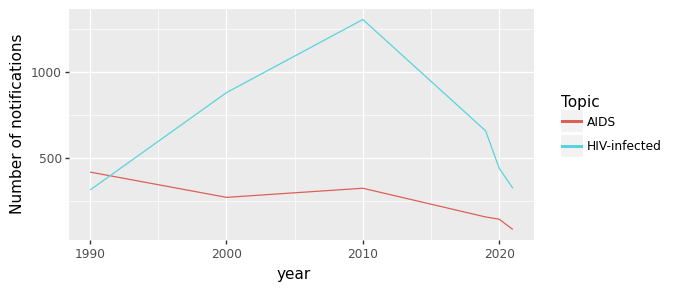

<ggplot: (697246678)>

In [17]:
(p9.ggplot(data=aids_df,
           mapping=p9.aes(x='year', y='value', color='Topic'))
    + p9.geom_line()
    + p9.theme(figure_size=(6, 3))
    + p9.xlim([1990, 2021])
    + p9.ylab('Number of notifications')
)

## 6. Health costs
One would expect that the percentage of people in good health would increase when the costs of our health system go up, is that true?
1. Take a look at the values for 'Care supply|Expenditures on care|Costs as a percentage of the GDP' and 'Health status|Persons in (very) good health'. What do you notice? Hint: You can still use `subset_data_starting_with()` and use `pandas.concat()` to concatenate dataframes.
2. Create a lineplot with the years on the x-axis and percentage y-axis. One line should represent the health costs as a percentage of the GDP, while the other line should show the percentage of people in (very) good health. Is this a good way of visualizing the data?
3. One way to visualize this data in a better way is to index it based on 1990. We make the values in 1990 100, and then for later years take the value relative to the value in 1990. So to calculate the indexed costs in 2000:
```python
costs_1990 = 10.9
costs_2000 = 10.0
indexed_costs_2000 = costs_2000 / 10.9 * 100
```
Calculate the indexed data and plot it in a lineplot. Hint: It is best to do the indexing operation before transforming the data to long format.

In [18]:
# Select the right subsets of the data
df1 = subset_data_starting_with(df, 'Care supply|Expenditures on care|Costs as a percentage of the GDP')
df2 = subset_data_starting_with(df, 'Health status|Persons in (very) good health')

# Concatenate the subsets
costs_df = pd.concat([df1, df2])

# Rename to last level topics
costs_df = rename_to_last_level(costs_df)

In [19]:
# It seems like the costs have gone up, but the percentage of persons in good health stays on the same level
costs_df

,unit,1900,1940,1980,1990,2000,2010,2019,2020,2021,2022
Topic,,,,,,,,,,,
Costs as a percentage of the GDP,%,NaN,NaN,10.6,10.9,10.0,13.4,13.2,14.5,14.5,NaN
Persons in (very) good health,%,NaN,NaN,NaN,81.7,80.4,80.3,78.7,81.5,80.5,NaN


/Users/svenvanderburg/miniforge3/envs/teaching/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 4 rows containing missing values.


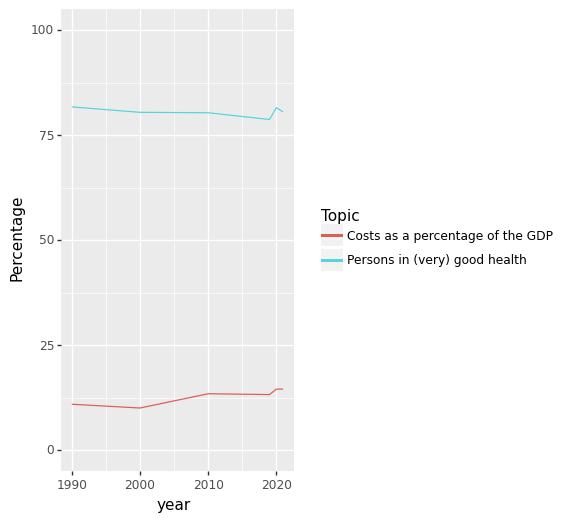

<ggplot: (697286650)>

In [20]:
long_df = to_long_format(costs_df)

(p9.ggplot(data=long_df,
           mapping=p9.aes(x='year', y='value', color='Topic'))
    + p9.geom_line()
    + p9.theme(figure_size=(3, 6))
    + p9.xlim([1990, 2021])
    + p9.ylim([0, 100])
    + p9.ylab('Percentage')
)

In [21]:
# Select the right subsets of the data
df1 = subset_data_starting_with(df, 'Care supply|Expenditures on care|Costs as a percentage of the GDP')
df2 = subset_data_starting_with(df, 'Health status|Persons in (very) good health')

# Concatenate the subsets
costs_df = pd.concat([df1, df2])

# Rename to last level topics
costs_df = rename_to_last_level(costs_df)

In [22]:
costs_df

,unit,1900,1940,1980,1990,2000,2010,2019,2020,2021,2022
Topic,,,,,,,,,,,
Costs as a percentage of the GDP,%,NaN,NaN,10.6,10.9,10.0,13.4,13.2,14.5,14.5,NaN
Persons in (very) good health,%,NaN,NaN,NaN,81.7,80.4,80.3,78.7,81.5,80.5,NaN


In [23]:
# Index the data based on 1990
for year in ['2000', '2010', '2019', '2020', '2021']:
    costs_df[year] = costs_df[year] / costs_df['1990'] * 100
costs_df['1990'] = 100

In [24]:
costs_df

,unit,1900,1940,1980,1990,2000,2010,2019,2020,2021,2022
Topic,,,,,,,,,,,
Costs as a percentage of the GDP,%,NaN,NaN,10.6,100,91.743119,122.935780,121.100917,133.027523,133.027523,NaN
Persons in (very) good health,%,NaN,NaN,NaN,100,98.408813,98.286414,96.328029,99.755202,98.531212,NaN


In [25]:
long_df = to_long_format(costs_df)

/Users/svenvanderburg/miniforge3/envs/teaching/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 4 rows containing missing values.


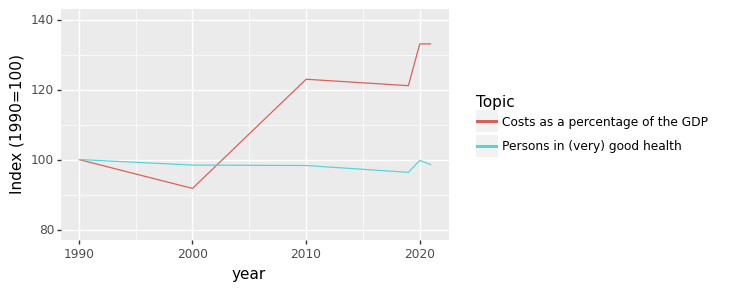

<ggplot: (697204333)>

In [26]:
(p9.ggplot(data=long_df,
           mapping=p9.aes(x='year', y='value', color='Topic'))
    + p9.geom_line()
    + p9.theme(figure_size=(5, 3))
    + p9.xlim([1990, 2021])
    + p9.ylim([80, 140])
    + p9.ylab('Index (1990=100)')
)

## 7. Bonus question: another dataset
Have a look at the [other CBS opendata datasets](https://opendata.cbs.nl/statline/#/CBS/en/navigatieScherm/thema). Pick a dataset that you like. Come up with interesting questions about the data and try to answer them using data analysis.